In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("/nfs/turbo/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl")
from travel import init_travel
init_travel()

In [2]:
 %reload_ext autoreload

# Test parsing method

In [18]:
import spacy
from travel.model.grounding import SpatialVisualFilter

nlp = spacy.load('en_core_web_md')
# test_questions = [
#     "Are the cherry tomatoes cut?",
#     "Are the cherry tomatoes not cut?",
#     "Are there cherry tomatoes in the bowl?",
#     "Are there any cherry tomatoes that are not in the bowl?"
# ]
test_questions = [
    "Is the garlic clove on the cutting board?",
    "Is the heat on?",
    "Is the heat on medium?",
    "Is the apple in a hand?",
    "Is the apple in someone's left hand?",
    "Is there tuna in the bowl that is not drained?",
    "Is the tablet on the table?",
    "Is the cleanser container somewhere not on the table?",
    "Is the wall painted?",
    "Is the container clean?",
    "Is there liquid in the container?"
]

SpatialVisualFilter.parse_questions_for_spatial_attention_filter(nlp, test_questions)

[(True, 'cutting board', 'Is the garlic clove in the image?'),
 (True, None, 'Is the heat on?'),
 (True, None, 'Is the heat on medium?'),
 (True, None, 'Is the apple in a hand?'),
 (True, None, "Is the apple in someone's left hand?"),
 (True, 'bowl', 'Is there tuna in the image that is not drained?'),
 (True, 'table', 'Is the tablet in the image?'),
 (False, 'table', 'Is the cleanser container somewhere in the image?'),
 (True, 'wall', 'Is the wall painted?'),
 (True, 'container', 'Is the container clean?'),
 (True, 'container', 'Is there liquid in the image?')]

# Test full spatial filter

In [3]:
from PIL import Image
import spacy
import torch
from travel.model.grounding import SpatialVisualFilter, ImageMaskTypes

visual_filter = SpatialVisualFilter(rephrase_questions=True, mask_strength=40.0, mask_type=ImageMaskTypes.Blur, device="cuda:0")
nlp = spacy.load('en_core_web_lg')

/home/sstorks/.cache/pypoetry/virtualenvs/travel-nQET-zRt-py3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


In [25]:
from pprint import pprint

# questions = ["Are there cherry tomatoes in the bowl?", 
#              "Are there any cherry tomatoes that are not in the bowl?"]
# frames = [Image.open("demo_images/demo_frame1.png").convert("RGB"),
#           Image.open("demo_images/demo_frame1.png").convert("RGB")]

# questions = ["Is the knife dirty?"]
# frames = [Image.open("demo_images/demo_frame1.png")]

# questions = ["Is the plate clean?",
#              "Is the plate clean?"]
# frames = [Image.open("/nfs/turbo/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl/saved_results/vqa_mistake_detection/captaincook4d/VQG2VQA_captaincook4d_llava-1.5-7b-hf_20240617181122/VQA_cache_val_worker1of1/frames/frame_1_20_11_b4cf361c-3f3a-40aa-8ce8-b292073d741b.jpg"),
#           Image.open("/nfs/turbo/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl/saved_results/vqa_mistake_detection/captaincook4d/VQG2VQA_captaincook4d_llava-1.5-7b-hf_20240617181122/VQA_cache_val_worker1of1/frames/frame_9_19_3_15602923-6cff-466b-a6dc-0914d5473bd6.jpg")]

# questions = ["Is the tablet on the table?",
#             "Is the brick broken?"]
# frames = [Image.open('saved_results/vqa_mistake_detection/ego4d/VQG2VQA_ego4d_debug_llava-1.5-7b-hf_spatial1.0_20240624115037/VQA_cache_val_worker1of1/frames/frame_f6eb8e9b-a925-4112-9eec-32393192e435-39-easyneg_MisalignSRL_ARG1_c8f8ebf1-5613-4f4a-802c-ada5e4c4b651_127.0138486_51b16362-c1d0-481e-b521-6d8590ad4c92.jpg'),
#           Image.open("demo_images/demo_frameb.png").convert("RGB")]

# questions = ["Is the container clean?",
#              "Is there liquid in the container?",
#              "Is the t-shirt folded?",
#              "Is the radio playing?"]
# frames = [Image.open("demo_images/demo_dirty_container.png").convert("RGB"),
#           Image.open("demo_images/demo_liquid_container.jpg").convert("RGB"),
#           Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl/saved_results/vqa_mistake_detection/ego4d/VQG2VQA_ego4d_debug_llava-1.5-7b-hf_spatial1.0_20240624193456/VQA_cache_val_worker1of1/frames/frame_47ba5fb2-0176-401d-8950-68df861c6bd1-89-hardneg_c11194c8-a542-4557-b94b-36b728c66e88.jpg"),
#           Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_partition4of4/1e5bd816-e1dd-43d3-8709-42c83114dc7c/158/easyneg_MisalignSRL_V_1e5bd816-e1dd-43d3-8709-42c83114dc7c_2693.796425266667/frames/frame_1e5bd816-e1dd-43d3-8709-42c83114dc7c-158-easyneg_MisalignSRL_V_1e5bd816-e1dd-43d3-8709-42c83114dc7c_2693.796425266667_0.jpg")]

# questions = ["Is the lettuce clean?",
#             "Is the strainer wet?",
#             "Is the counter empty?"]
# frames = [Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_partition4of4/1ab9d5f7-0181-458e-a5e7-72ce87501f3e/51/pos/frames/frame_1ab9d5f7-0181-458e-a5e7-72ce87501f3e-51-pos_0.jpg")] * 3

# questions = ["Is the tablet being operated?", "Is someone dialing?", "Is the phone being operated?"]
# img1 = Image.open("saved_results/vqa_mistake_detection/ego4d/VQG2VQA_ego4d_debug_llava-1.5-7b-hf_spatial1.0_20240625190118/VQA_cache_val_worker1of1/frames/frame_f6eb8e9b-a925-4112-9eec-32393192e435-39-easyneg_MisalignSRL_ARG1_c8f8ebf1-5613-4f4a-802c-ada5e4c4b651_127.0138486_85d35c4e-f22f-414d-83e5-9047508e24fa.jpg")
# img2 = Image.open("saved_results/vqa_mistake_detection/ego4d/VQG2VQA_ego4d_debug_llava-1.5-7b-hf_spatial_norephrase1.0_20240626143553/VQA_cache_val_worker1of1/frames/frame_c864505c-9d49-4da4-bf7e-254b4c348c03-137-hardneg_8585f085-40ed-4f39-98c3-4c3926e0a304.jpg")
# img3 = Image.open('saved_results/vqa_mistake_detection/ego4d/VQG2VQA_ego4d_debug_llava-1.5-7b-hf_spatial1.0_20240626154614/VQA_cache_val_worker1of1/frames/frame_7a43089b-fad6-4ba2-8d3f-ba47c2efc61e-5-pos_2864afe0-b11f-4340-8810-52d0958b6f23.jpg')
# frames = [img1, img2, img3]

# questions = ["Is the can dirty?"]
# frames = [Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_partition1of4/e4ab68fe-3560-4dc1-8dbf-f8d4df39f770/26/pos/frames/frame_e4ab68fe-3560-4dc1-8dbf-f8d4df39f770-26-pos_0.jpg")]

questions = ["Is the lettuce dirty?", "Is the lettuce dirty?"]
frames = [Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_multiframe_partition4of4/1ab9d5f7-0181-458e-a5e7-72ce87501f3e/38/pos/frames/frame_1ab9d5f7-0181-458e-a5e7-72ce87501f3e-38-pos_0.jpg"),
         Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_multiframe_partition4of4/1ab9d5f7-0181-458e-a5e7-72ce87501f3e/38/pos/frames/frame_1ab9d5f7-0181-458e-a5e7-72ce87501f3e-38-pos_2.jpg")]

running detection (cuda:0): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

[{'lettuce': 3}, {'lettuce': 2}]


In [4]:
from travel.data.ego4d import Ego4DMistakeDetectionDataset
dataset = Ego4DMistakeDetectionDataset(data_split="val", mismatch_augmentation=True, multi_frame=True, debug_n_examples_per_class=20)

frames = []
for example in dataset:
    frames += example.frames
frames = frames[15:20]
questions = ["Is the lettuce dirty?" for _ in frames]

In [5]:
from pprint import pprint
new_frames, new_questions, target_object_counts = visual_filter(nlp, frames, questions)
pprint(target_object_counts)

running detection (cuda:0): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

[{'lettuce': 3}, {'lettuce': 2}, {'lettuce': 2}, {'lettuce': 2}, {'lettuce': 1}]


## Show new frames

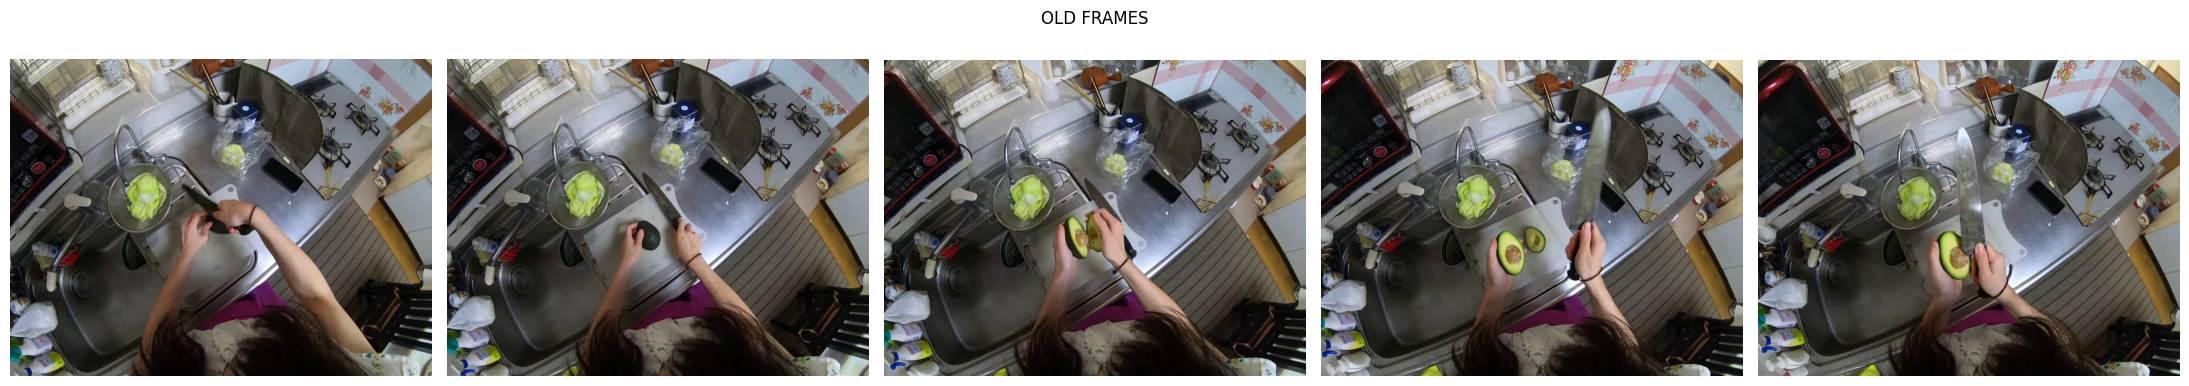

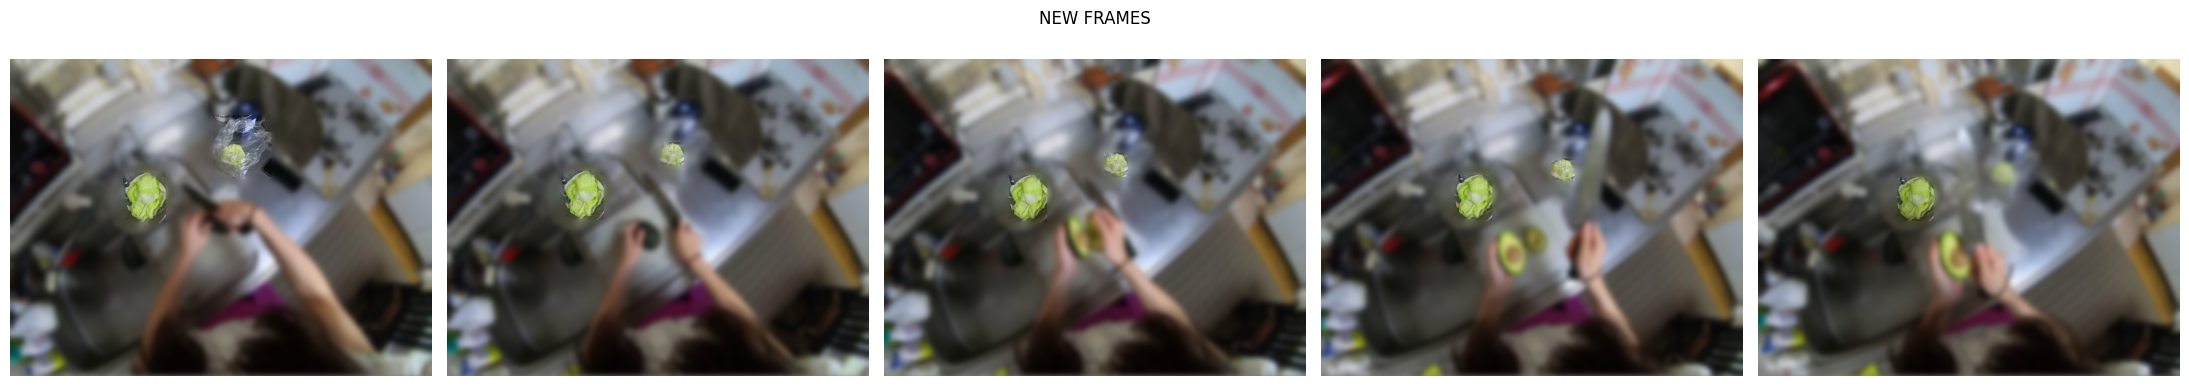

In [7]:
import matplotlib.pyplot as plt

# Assuming new_frames is a list of image data
fig, axarr = plt.subplots(1, len(frames), figsize=(22, 4))
fig.suptitle("OLD FRAMES")

# Ensure axarr is always iterable
if len(frames) == 1:
    axarr = [axarr]

for frame, ax in zip(frames, axarr):
    if frame is not None:
        ax.imshow(frame)
        ax.axis('off')  # Hide the axes for better visualization

plt.tight_layout()
plt.show()

# Assuming new_frames is a list of image data
fig, axarr = plt.subplots(1, len(new_frames), figsize=(22, 4))
fig.suptitle("NEW FRAMES")

# Ensure axarr is always iterable
if len(new_frames) == 1:
    axarr = [axarr]

for frame, ax in zip(new_frames, axarr):
    if frame is not None:
        ax.imshow(frame)
        ax.axis('off')  # Hide the axes for better visualization

plt.tight_layout()
plt.show()

In [15]:
from transformers import AutoModelForVision2Seq, AutoProcessor, BitsAndBytesConfig
from travel.data.vqa import VQG2VQA_PROMPT_TEMPLATES
from travel.model.vqa import run_vqa

try:
    del visual_filter
except:
    pass

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    llm_int8_threshold=6.0,
    llm_int8_has_fp16_weight=False,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)
vlm = AutoModelForVision2Seq.from_pretrained("llava-hf/llava-1.5-7b-hf", 
                                             quantization_config=bnb_config)
vlm_processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")
vlm_processor.tokenizer.padding_side = "left"
_ = run_vqa(vlm, vlm_processor, [VQG2VQA_PROMPT_TEMPLATES[type(vlm)].format(question=question.strip()) for question in questions], new_frames, batch_size=1, cache_path=None)

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
running VQA (cuda:0): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


In [18]:
from travel.data.utils.image import resize_with_aspect

save_frame = new_frames[0]
save_frame = resize_with_aspect(save_frame, 200)
save_frame.save("temp.jpg")

## Show new questions

In [11]:
from pprint import pprint

pprint(new_questions)

['Is the container clean?']


# Test target object counting

In [5]:
from travel.model.grounding import TargetObjectCounterFilter
import spacy
from PIL import Image

filt = TargetObjectCounterFilter()
nlp = spacy.load('en_core_web_md')

questions = ["In a bowl, add the cut cherry tomatoes with a screwdriver", 
             "In a bowl, add the cut cherry tomatoes with a screwdriver",
             "In a bowl, add the cut cherry tomatoes with a screwdriver"]
frames = [Image.open("demo_images/demo_frame0.png"),
          Image.open("demo_images/demo_frame1.png"),
          Image.open("demo_images/demo_frame2.png")]

print(filt(nlp, frames, questions))

`low_cpu_mem_usage` was None, now set to True since model is quantized.
running detection (cuda:0): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

[3, 20, 4]


In [58]:
from travel.model.grounding import TargetObjectCounterFilter, SpatialVisualFilter, ContrastiveRegionFilter
import spacy
from pprint import pprint

nlp = spacy.load('en_core_web_lg') # TODO: try lg model

questions = ["In a bowl, add the cut cherry tomatoes with a screwdriver",
             "Is the mechanics mobile seat being dragged?",
             "Is the mechanics mobile seat in someone's hands?",
             "Is the concrete cut?",
             "Is the lawn mower being held?",
             "Is the grass cut?",
             "Is there a hand on the branch?",
             "Is there any clay that is not in the brick mold?",
             "Is the concrete in the blue bucket?",
             "Is there a container in the image?",
             "Is the cut piece of wood on the wood cutting machine table?",
             "Is the piece of wood blue?",
             "Is the cut piece of wood on the wood cutting machine table?",
             "Is there a piece of cutting board on the table?",
             "Is the pile of books on the shelf?",
             "Is the pile of cherry tomatoes in the bowl?"]
# questions = [
#     "Is the cut piece of wood on the wood cutting machine table?",
#     "Is the piece of wood blue?",
#     "Is there a piece of cutting board on the table?",
#     "Is the pile of books on the shelf?",
#     "Is the pile of cherry tomatoes in the bowl?"
# ]

target_objects1 = TargetObjectCounterFilter.parse_sentences_for_target_objects(nlp, questions)
# target_objects2 = ContrastiveRegionFilter.parse_questions_for_contrastive_region_filter(nlp, questions)
spatial_parse = SpatialVisualFilter.parse_questions_for_spatial_attention_filter(nlp, questions)

print("")
for sentence, obj1, spatial in zip(questions, target_objects1, spatial_parse):
    print(f"{sentence} -> {obj1}")
    print(spatial)
    print("")


In a bowl, add the cut cherry tomatoes with a screwdriver -> ['bowl', 'cherry tomatoes', 'screwdriver']
(True, 'screwdriver', 'In a bowl, add the cut cherry tomatoes with a screwdriver')

Is the mechanics mobile seat being dragged? -> ['seat']
(True, 'seat', 'Is the mechanics mobile seat being dragged?')

Is the mechanics mobile seat in someone's hands? -> ['seat', 'hands']
(True, 'hands', 'Is the mechanics mobile seat in the image?')

Is the concrete cut? -> []
(True, None, 'Is the concrete cut?')

Is the lawn mower being held? -> ['lawn mower']
(True, 'lawn mower', 'Is the lawn mower being held?')

Is the grass cut? -> ['grass']
(True, 'grass', 'Is the grass cut?')

Is there a hand on the branch? -> ['hand', 'branch']
(True, 'branch', 'Is there a hand in the image?')

Is there any clay that is not in the brick mold? -> ['clay', 'brick mold']
(False, 'brick mold', 'Is there any clay that is in the image?')

Is the concrete in the blue bucket? -> ['concrete', 'bucket']
(True, 'bucket'